## Working with Data & a Real Cost Function
### Mean Squared Error(MSE): a cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} (y^{(i)} - h_\theta x^{(i)} )^2 $$
where $h_\theta x^{(i)}$ is $\theta_0 + \theta_1 \cdot x$ which is the predicted value
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - h_\theta x^{(i)} )^2 $$ or $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y} )^2 $$
where $\hat{y}$ is the predicted value<br>

### Why MSE better than RSS?

When we deal with large dataset, the RSS can be really large and it may overflow.<br>
By dividing the number of samples, we can prevent the overflow issue.

### Importing Packages

In [42]:
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # color map
#from mpl_toolkits import mplot3d # 3D plot required library
#from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Transposing and Reshaping Arrays

Preparing input data

In [31]:
# In order to use linear Regression function, a 2D input is required

x = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]) # This is 1 dimensional input
y = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]) # This is 2D but wrong format

print('Shape of array x:', x.shape)
print('Shape of array y:', y.shape)

x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() 
y = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7,1) # you can use transpose or reshape, and they both work

print('Shape of array x:', x.shape)
print('Shape of array y:', y.shape)


Shape of array x: (7,)
Shape of array y: (1, 7)
Shape of array x: (7, 1)
Shape of array y: (7, 1)


In [47]:
# Quick linear Regression
regr = LinearRegression()
regr.fit(x, y)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])
print('Predicted value:\n',regr.predict(x))

Theta 0: 0.8475351486029554
Theta 1: 1.222726463783591
Predicted value:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


### Plotting and Observe the Actual values and Predicted Values

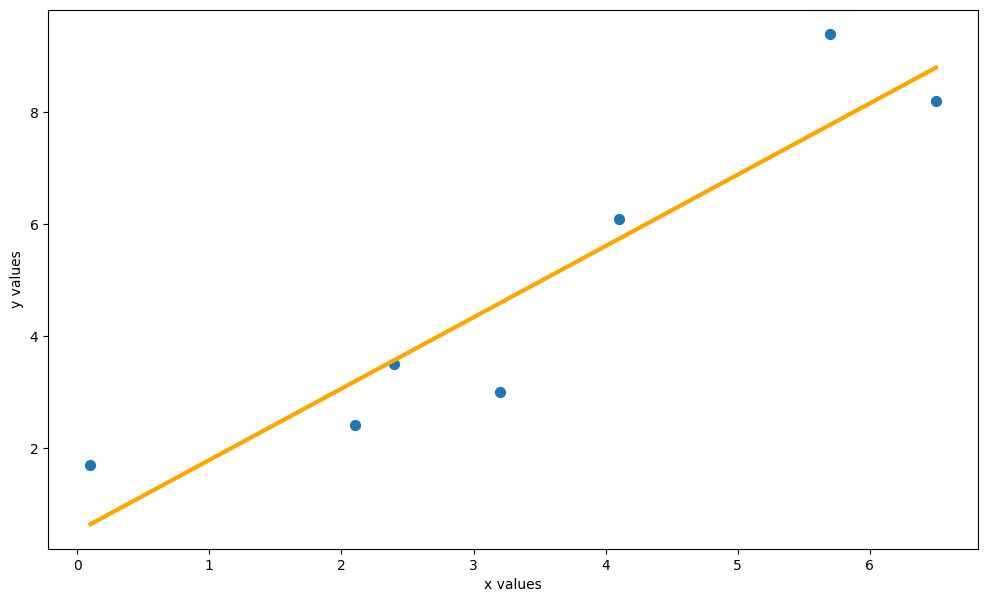

In [27]:
plt.figure(figsize=(12,7))
plt.scatter(x,y,s=50) # Plot input data
plt.plot(x,regr.predict(x),color='orange', linewidth=3) # plot predict regression linear function
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [35]:
# y_hat = theta0 + theta1 * x
y_hat = 0.847535148603 + 1.22272646378 * x
print('Predicted value y_hat are: \n', y_hat)
print('In comparision, the actual y values are \n', y)

Predicted value y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparision, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


### Python Function mse(y, y_hat) Return the MSE
**Manual Calculation:**

In [40]:
def mse(y, y_hat):
    #mse_calc = (1/y.size) * sum((y - y_hat) ** 2)
    # Alternative way
    mse_calc = np.average((y-y_hat) ** 2, axis = 0) # axis = 0 means average the rows, not column

    return mse_calc

print('Manually calculated MSE is:',mse(y, y_hat))

Manually calculated MSE is: [0.94796558]


**Using in-build Sklearn function:**

In [43]:
print('Sklearn in-build calculated MSE is:', mean_squared_error(y, y_hat))

Sklearn in-build calculated MSE is: 0.947965575979458


In [44]:
print('MSE regression is:', mean_squared_error(y, regr.predict(x)))

MSE regression is: 0.9479655759794575
